In [1]:
import jaccard_recs as jr
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
user_dict = jr.import_user_dict(filepath="..\\data\\pickled-data\\user_dict.p")

In [3]:
edges = jr.edgelist_from_user_dict(user_dict)

In [4]:
train, test = jr.train_test_split_edgelist(edges)

In [5]:
G = nx.k_core(nx.DiGraph(train), k=2)

In [6]:
len(G.nodes)

1831

In [7]:
G.in_degree(nbunch='msg')

30

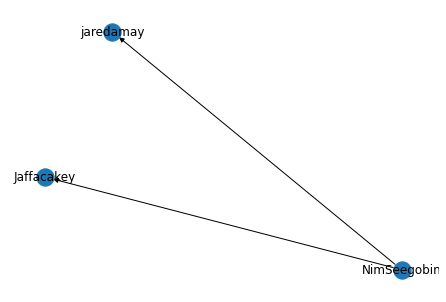

In [8]:
hub_ego = nx.ego_graph(G, 'NimSeegobin', radius=1, undirected=True)

nx.draw(hub_ego, pos=nx.circular_layout(G), with_labels=True)

plt.show()

In [9]:
all_jaccard_coefficients = list(jr.jaccard_coefficient(G))

In [10]:
jr.sort_jaccard_coefficients(all_jaccard_coefficients, user='NimSeegobin')

[('NimSeegobin', 'innovativeedge', 0.3333333333333333),
 ('NimSeegobin', 'markgrey', 0.3333333333333333),
 ('NimSeegobin', 'jgadola', 0.25),
 ('NimSeegobin', 'ingridbee', 0.125),
 ('NimSeegobin', 'alysia', 0.1111111111111111),
 ('NimSeegobin', 'lfiske29', 0.08333333333333333),
 ('NimSeegobin', 'charbrew', 0.05),
 ('NimSeegobin', 'wcquigley', 0.045454545454545456),
 ('NimSeegobin', 'tantonino', 0.03571428571428571),
 ('NimSeegobin', 'setownsend', 0.02564102564102564),
 ('NimSeegobin', 'mad_tea_party', 0.017543859649122806),
 ('NimSeegobin', 'teatoxy-shop', 0.01680672268907563),
 ('NimSeegobin', 'jack', 0.015151515151515152),
 ('NimSeegobin', 'jason-kim', 0.014084507042253521),
 ('NimSeegobin', 'leafboxtea', 0.009708737864077669),
 ('NimSeegobin', 'JillDragon', 0.008064516129032258),
 ('NimSeegobin', 'Green_Tea_TV', 0.007633587786259542),
 ('NimSeegobin', 'greenboar', 0.006578947368421052),
 ('NimSeegobin', 'gormaya', 0.0055248618784530384),
 ('NimSeegobin', 'The_Tea_Show', 0.00544959128

In [40]:
[i for i in test if 'NimSeegobin' in i[0]]

[]

In [89]:
G.out_degree('BlueChai')

378

In [90]:
G.in_degree('BlueChai')

24

In [34]:
set(G['NimSeegobin'])

{'Jaffacakey', 'jaredamay'}

In [39]:
print(set(G['markgrey']))
print(set(G['thefaceofjace']))
print(set(G['darjeelinglimited']))
print(set(G['alysia']))

{'jason', 'jaredamay'}
{'innovativeedge', 'jaredamay'}
{'teaequalsbliss', 'Jaffacakey'}
{'harneytea', 'Jaffacakey', 'Janelle', 'CassieMarieEng', 'awkwardsoul', 'Kinsa'}


As far as I can tell, the precision @ k calculation is working correctly. User `NimSeegobin` is a good example. He is only following three people, and two of them are in this graph. When I look at the top recommendations per the Jaccard index, the coefficients are correct, but `NimSeegobin` follows so few people that it's nearly impossible to predict the 1 that we don't already know. Also, `NimSeegobin` isn't even in the test dataset, so he's always going to be 0.0 and drag down the average precision.

Potential solution:
* Use the entire dataset for calculating Jaccard coefficients, but only check them in the test data if they are following at least _X number_ of users (`G.out_degree(user)`). That can start out at 20, but it would be a good idea to test different levels. Maybe there's something like an elbow plot where if I plot the avg overall p@k for different test following numbers.

The incomplete dataset makes this even more difficult. For example, `NimSeegobin` follows these three users: `Jaffacakey`, `jaredamay`, and `adamnowak`. They are all in the user_dict, but only two of them have been scraped.  Hmm... actually, that shouldn't matter because scraping them just gets their followers, and we are trying to find people that they follow. Geez, I feel like I set up the scraper wrong and should have focused on following... oh well!

### Evaluate recs w/ precision at k (_P@k(u)_) items recommended

In [33]:
p_at_k_all, p_at_k_dict = jr.calculate_precision_at_k(G, all_jaccard_coefficients,
                                                      test_data=test, H=edges,
                                                      H_threshold=15,n=500,
                                                      k=20, seed=123)

In [34]:
p_at_k_dict

{'spharo': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'zeitfliesst': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157894736842,
  0.05],
 'CHAroma': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'feralanima': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157894736842,
  0.05],
 'slygirl': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'mrmopar': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  

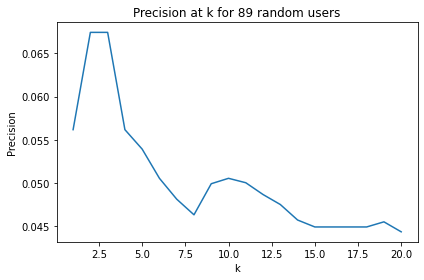

In [35]:
avg_p_at_k_all = jr.calculate_avg_precision_at_k(p_at_k_all=p_at_k_all)

In [13]:
avg_p_at_k_all

array([0.01      , 0.015     , 0.01666667, 0.015     , 0.012     ,
       0.01      , 0.01142857, 0.01125   , 0.01111111, 0.011     ])

In [24]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

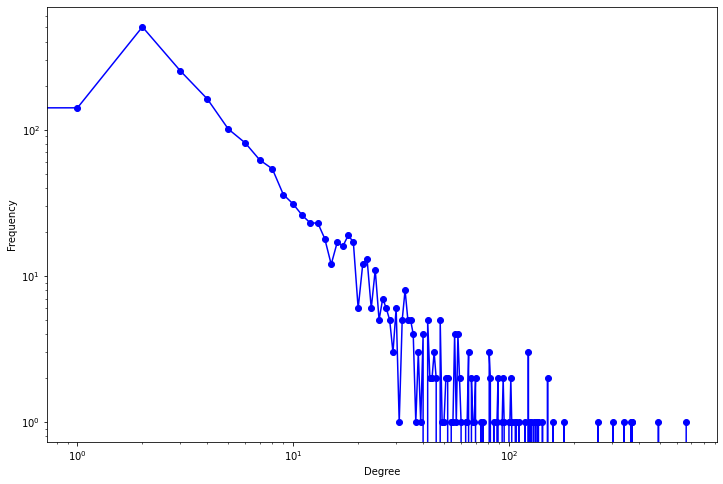

In [29]:
out_degree_freq = degree_histogram_directed(G, out_degree=True, in_degree=False)
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

## Under Development: Get communities

Ignore all of this community stuff for now

In [247]:
G_louvain = nx_comm.louvain_communities(G, seed=123, resolution=0.75)

In [248]:
len(G_louvain)

79

In [ ]:
[len(community) for community in G_louvain]

In [184]:
G_greedymod = nx_comm.greedy_modularity_communities(G, resolution=0.5)

In [185]:
len(G_greedymod)

14

In [186]:
[len(community) for community in G_greedymod]

[3343, 14, 13, 6, 6, 4, 4, 2, 2, 2, 2, 2, 2, 2]

In [192]:
G_asyn_lpa = nx_comm.asyn_lpa_communities(G, seed=123)

In [190]:
len(list(G_asyn_lpa))

9

In [193]:
[len(community) for community in list(G_asyn_lpa)]

[3342, 24, 2, 8, 4, 3, 4, 5, 12]

I'm going to use Louvain communities for now because the other two algorithms are primarily stuck on one very large cluster and a few others that are too small to be useful.

In [198]:
i = 1
community_dict = {}

for comm in G_louvain:
    for user in comm:
        community_dict[user] = i
    i += 1

In [232]:
print(f"User 'jack' is in community {community_dict['jack']}.")
print(f"User 'teaequalsbliss' is in community {community_dict['teaequalsbliss']}.")
print(G.nodes['teaequalsbliss'])

User 'jack' is in community 2.
User 'teaequalsbliss' is in community 4.
{'community': 4}


Okay, we've successfully segmented the network. Now we map the corresponding community to the node attribute "community".

In [208]:
nx.set_node_attributes(G, community_dict, "community")

In [ ]:
all_jaccard_coefficients = community_jaccard_coefficients(G, G_louvain)